In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
twitter_data = pd.read_csv('COVIDSenti.csv')
twitter_data.head()

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu


In [5]:
twitter_data.shape

(90000, 2)

In [6]:
twitter_data.isnull().sum()

,0
tweet,0
label,0


In [7]:
twitter_data['label'].value_counts()

,count
label,
neu,67385
neg,16335
pos,6280


In [8]:
# 0-> neutral, 1-> positive 2-> negative
twitter_data['label'] = twitter_data['label'].replace({'neu': 0, 'pos': 1, 'neg': 2})

print(twitter_data['label'].value_counts())

label
0    67385
2    16335
1     6280
Name: count, dtype: int64


<ipython-input-8-e3ad959fbf97>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  twitter_data['label'] = twitter_data['label'].replace({'neu': 0, 'pos': 1, 'neg': 2})


In [9]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    return text

twitter_data['lemmatized_text'] = twitter_data['tweet'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
twitter_data.head()

,tweet,label,lemmatized_text
0,Coronavirus | Human Coronavirus Types | CDC ht...,0,coronavirus human coronavirus type cdc http co...
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",0,shehryar taseer true corona virus swine flue b...
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",2,tldr sars possibly new coronavirus difficult c...
3,Disease outbreak news from the WHO: Middle Eas...,0,disease outbreak news middle east respiratory ...
4,China - Media: WSJ says sources tell them myst...,0,china medium wsj say source tell mystery pneum...


In [11]:
X = twitter_data['lemmatized_text'].values
Y = twitter_data['label'].values

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(90000,) (72000,) (18000,)


In [14]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Prediction on training data
prediction_on_training_data = model.predict(X_train)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

# Prediction on test data
prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)




Accuracy on training data :  0.9998888888888889
Accuracy on test data :  0.8703888888888889
[[12953   134   390]
 [  782   467     7]
 [ 1012     8  2247]]


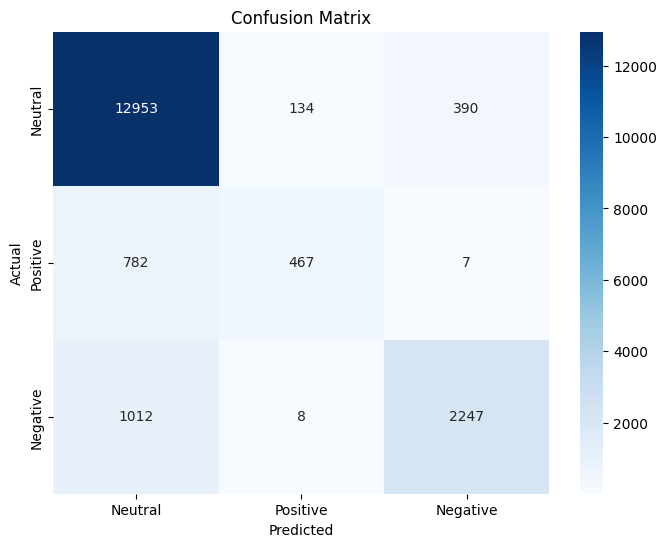

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, prediction_on_test_data)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(nb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Best model from grid search
best_nb_model = grid_search.best_estimator_

# Prediction on training data
nb_prediction_on_training_data = best_nb_model.predict(X_train)
nb_accuracy_on_training_data = accuracy_score(Y_train, nb_prediction_on_training_data)
print('Optimized Naive Bayes Accuracy on training data : ', nb_accuracy_on_training_data)

# Prediction on test data
nb_prediction_on_test_data = best_nb_model.predict(X_test)
nb_accuracy_on_test_data = accuracy_score(Y_test, nb_prediction_on_test_data)
print('Optimized Naive Bayes Accuracy on test data : ', nb_accuracy_on_test_data)

# Print the best alpha value
print('Best alpha value:', grid_search.best_params_['alpha'])


Optimized Naive Bayes Accuracy on training data :  0.93675
Optimized Naive Bayes Accuracy on test data :  0.7806666666666666
Best alpha value: 0.1


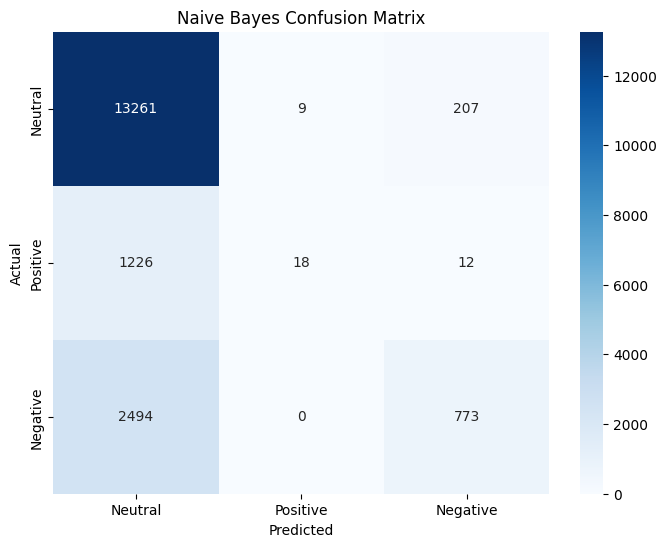

In [ ]:
# Confusion matrix for Naive Bayes
nb_cm = confusion_matrix(Y_test, nb_prediction_on_test_data)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, Y_train)

# Prediction on training data
dt_prediction_on_training_data = dt_model.predict(X_train)
dt_accuracy_on_training_data = accuracy_score(Y_train, dt_prediction_on_training_data)
print('Decision Tree Accuracy on training data : ', dt_accuracy_on_training_data)

# Prediction on test data
dt_prediction_on_test_data = dt_model.predict(X_test)
dt_accuracy_on_test_data = accuracy_score(Y_test, dt_prediction_on_test_data)
print('Decision Tree Accuracy on test data : ', dt_accuracy_on_test_data)

Decision Tree Accuracy on training data :  1.0
Decision Tree Accuracy on test data :  0.8602222222222222


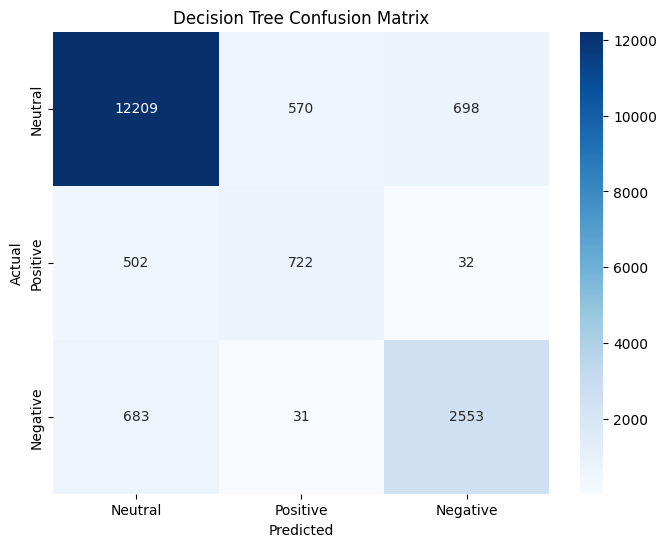

In [ ]:
# Confusion matrix for Decision Tree
dt_cm = confusion_matrix(Y_test, dt_prediction_on_test_data)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [18]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, Y_train)

# Prediction on training data
xgb_prediction_on_training_data = xgb_model.predict(X_train)
xgb_accuracy_on_training_data = accuracy_score(Y_train, xgb_prediction_on_training_data)
print('XGBoost Accuracy on training data : ', xgb_accuracy_on_training_data)

# Prediction on test data
xgb_prediction_on_test_data = xgb_model.predict(X_test)
xgb_accuracy_on_test_data = accuracy_score(Y_test, xgb_prediction_on_test_data)
print('XGBoost Accuracy on test data : ', xgb_accuracy_on_test_data)


XGBoost Accuracy on training data :  0.8797638888888889
XGBoost Accuracy on test data :  0.8565


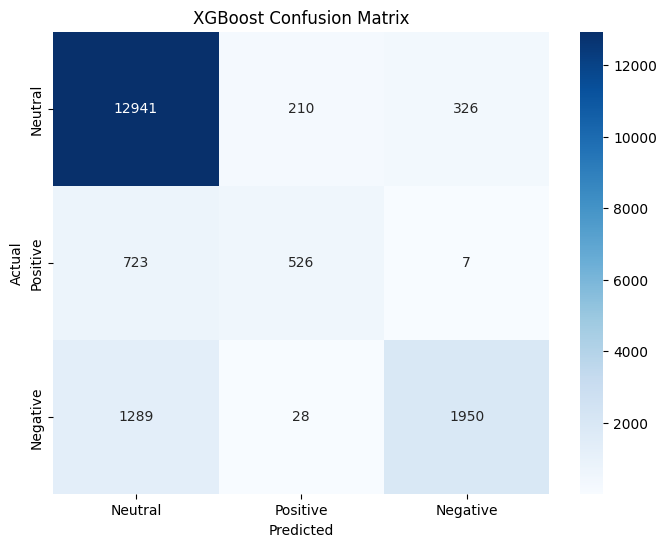

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for XGBoost
xgb_cm = confusion_matrix(Y_test, xgb_prediction_on_test_data)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Positive', 'Negative'],
            yticklabels=['Neutral', 'Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()
